# Problem Statement : 

# Flight Ticket Price Prediction : 

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable.

# Factors affecting Flightfare . 

In [195]:
import pandas as pd
import numpy as np
import seaborn as sns
import sweetviz 
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline 

In [196]:
# importing data
train = pd.read_excel("Data_Train.xlsx")
test  = pd.read_excel("Test_set.xlsx")
print("shape of train data : ",train.shape)
print("shape of test  data : ",test.shape)

shape of train data :  (10683, 11)
shape of test  data :  (2671, 10)


In [197]:
train.columns = [i.lower() for i in train.columns]
test.columns  = [i.lower() for i in test.columns]

# Data Preprocessing 

In [198]:
# DROPING DUPLICATE VALUES .
train.drop_duplicates(inplace = True,ignore_index = True)
test.drop_duplicates(inplace = True,ignore_index = True)
print("After Dropping Duplicates : ")
print("shape of train data : ",train.shape)
print("shape of test  data : ",test.shape)

After Dropping Duplicates : 
shape of train data :  (10463, 11)
shape of test  data :  (2645, 10)


In [199]:
# dropping rows with missing value .
train.dropna(axis = 0,inplace = True)
print("Count of missing values in train set : ",train.isnull().sum().sum())

Count of missing values in train set :  0


In [200]:
# check for missing values in test set.
print("Count of missing values in test set : ",train.isnull().sum().sum())

Count of missing values in test set :  0


In [201]:
# let me drop some unwanted features (again i'm dropping these features based upon some domain knowledge)
train.drop(["dep_time","arrival_time","total_stops","additional_info"],axis =1,inplace = True)
test.drop(["dep_time","arrival_time","total_stops","additional_info"],axis =1,inplace = True)

In [202]:
# retriving date and month from date of journey column 
train["day"] = pd.to_datetime(train["date_of_journey"]).dt.day
train["month"] = pd.to_datetime(train["date_of_journey"]).dt.month
test["day"] = pd.to_datetime(test["date_of_journey"]).dt.day
test["month"] = pd.to_datetime(test["date_of_journey"]).dt.month
train.drop(["date_of_journey"],axis = 1 ,inplace  = True)
test.drop(["date_of_journey"],axis = 1 ,inplace  = True)

In [203]:
# considering new delhi has delhi only 

train["source"] = train["source"].str.strip()
train["destination"] = train["destination"].str.strip()
train.loc[train["source"]=="New Delhi","source"] = "Delhi"
train.loc[train["destination"]=="New Delhi","destination"] = "Delhi"
test.loc[test["source"]=="New Delhi","source"] = "Delhi"
test.loc[test["destination"]=="New Delhi","destination"] = "Delhi"

In [204]:
# unique count in route column.
print("unique values in train route column : ",train.route.nunique())
print("unique values in test route  column : ",train.route.nunique())

unique values in train route column :  128
unique values in test route  column :  128


In [205]:
# we can see that duration is only 5 minutes that to between mumbai to Hyderabad which is highly impossible ! 
train[train["duration"]=="5m"].iloc[:,:]

,airline,source,destination,route,duration,price,day,month
6397,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,17327,3,6


In [206]:
test[test["duration"]=="5m"].iloc[:,:]

,airline,source,destination,route,duration,day,month
2634,Air India,Mumbai,Hyderabad,BOM → GOI → PNQ → HYD,5m,3,12


In [207]:
# dropping above row
train.drop(6397,axis = 0,inplace = True)
test.drop(2634,axis = 0,inplace = True)
# resetting index
train.reset_index(drop= True,inplace = True)
test.reset_index(drop= True,inplace = True)

In [208]:
# handling duration column.
train["dur_hours"] = train["duration"].str.split("h").str[0].astype(int)*60
test["dur_hours"]  = test["duration"].str.split("h").str[0].astype(int)*60

In [209]:
train["dur_mints"] = train["duration"].str.replace("m","").str.split(" ").str[1]
test["dur_mints"]  = test["duration"].str.replace("m","").str.split(" ").str[1]
train["dur_mints"].fillna(0,axis = 0,inplace = True)
test["dur_mints"].fillna(0,axis = 0,inplace = True)
train["dur_mints"] = train["dur_mints"].astype(int)
test["dur_mints"]  = test["dur_mints"].astype(int)
train["total_mints"] = train["dur_hours"] + train["dur_mints"]
test["total_mints"]  = test["dur_hours"]  + test["dur_mints"]
train.head(1)

,airline,source,destination,route,duration,price,day,month,dur_hours,dur_mints,total_mints
0,IndiGo,Banglore,Delhi,BLR → DEL,2h 50m,3897,24,3,120,50,170


In [210]:
# drop some features .
train.drop(["duration","dur_hours","dur_mints"],axis = 1,inplace = True)
test.drop(["duration","dur_hours","dur_mints"],axis = 1,inplace = True)

In [211]:
train.head(1)

,airline,source,destination,route,price,day,month,total_mints
0,IndiGo,Banglore,Delhi,BLR → DEL,3897,24,3,170


# EDA with SWEETVIZ library

In [265]:
# Sweetviz is a open source library that helps in creating beautiful visuals and thus helps in saving timimg while doing  EDA  .

In [212]:
train_report = sweetviz.analyze([train,"Train"],target_feat = "price")

In [213]:
train_report.show_html('Report.html')
# snapshot of visuals created by sweetviz

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


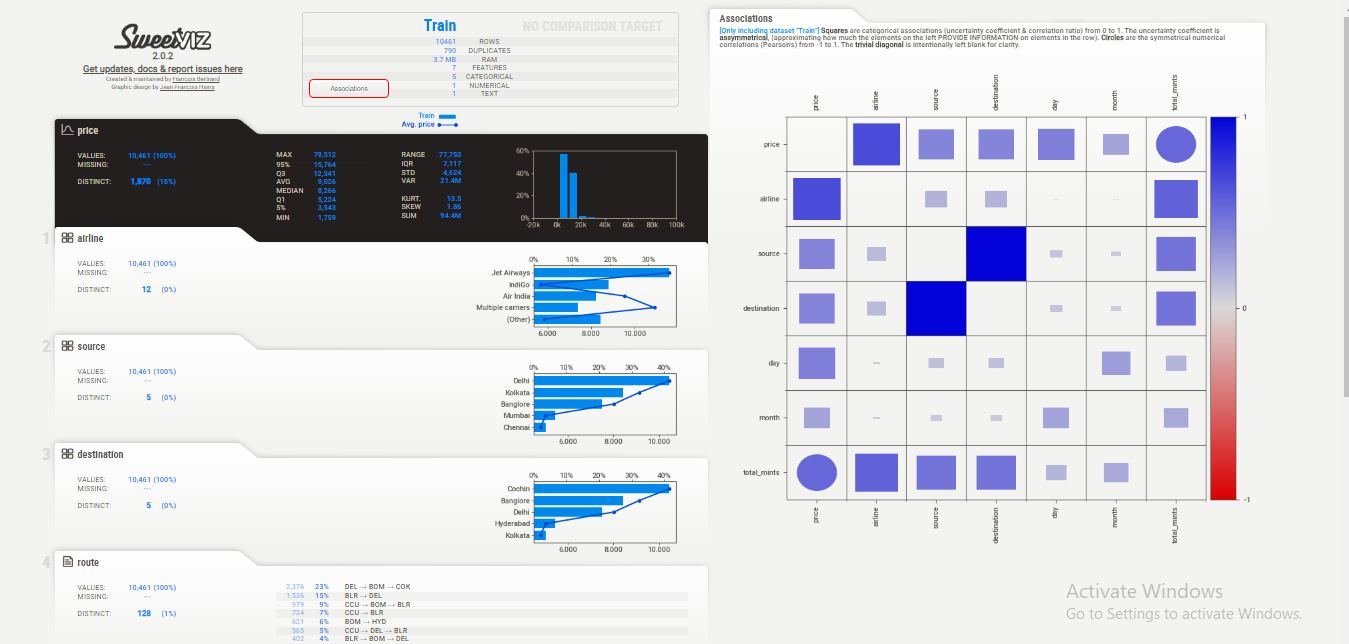

#### Note : again we obtained some duplicate rows that is obtained after creating month and day column so i am droping it .

In [214]:
# refer  :  Report.html page
train.drop_duplicates(inplace = True,ignore_index = True)
test.drop_duplicates(inplace = True,ignore_index = True)

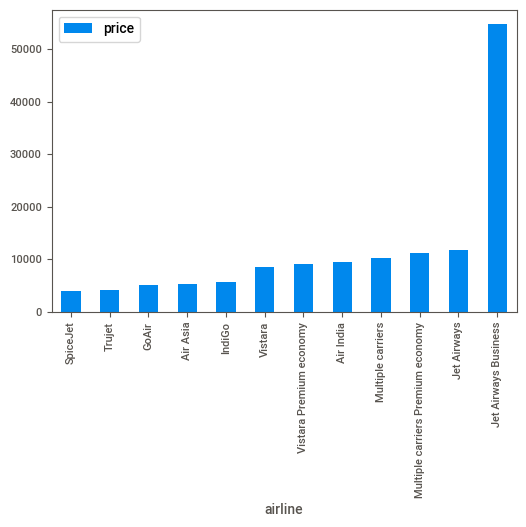

In [215]:
pd.DataFrame(train.groupby(train["airline"])["price"].median()).sort_values(by = "price").plot(kind = "bar")

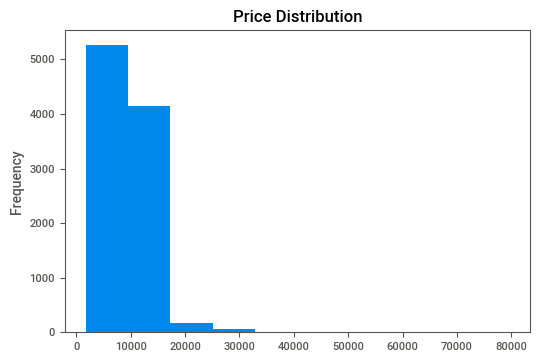

In [216]:
#fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))
train["price"].plot(kind = "hist",title = "Price Distribution")

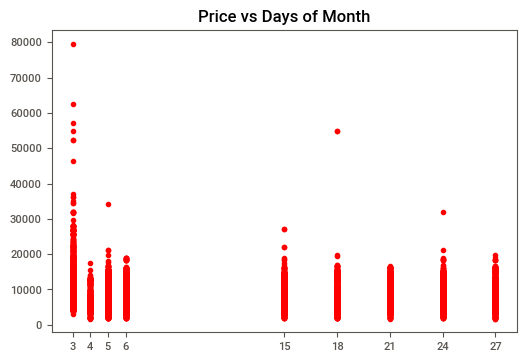

In [217]:
# note : flight fare is high on starting of every month
plt.scatter(train.day,train["price"],c = "red")
plt.title("Price vs Days of Month")
plt.xticks(train.day.unique())
plt.show()

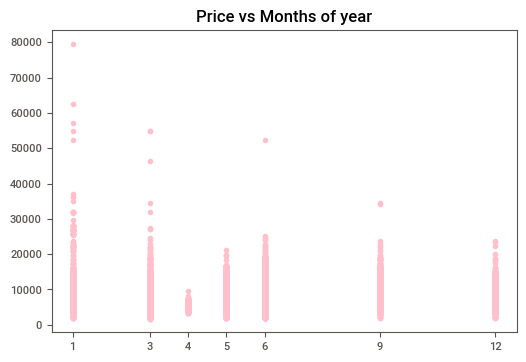

In [218]:
# note : flight fare is high on starting of every year eg : month January
plt.scatter(train.month,train["price"],c = "pink")
plt.title("Price vs Months of year")
plt.xticks(train.month.unique())
plt.show()

duration in hours :  8.0 hours


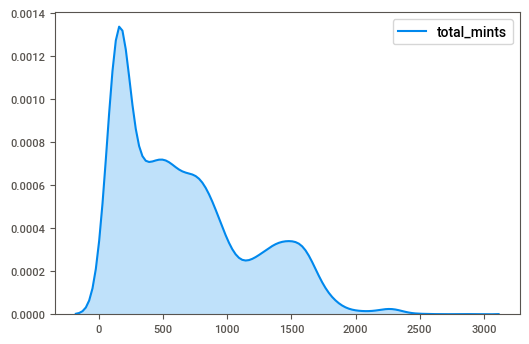

In [219]:
# most of the flight's duration is between
print("duration in hours : ",round(500/60,0),"hours")
sns.kdeplot(train["total_mints"],shade = True )

# Feature engineering 

In [220]:
# delhi to cochin
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Cochin")].index ,"distance"] = 2080
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Delhi")].index ,"distance"] = 2080
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Cochin")].index ,"distance"] = 2080
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Delhi")].index ,"distance"] = 2080

In [221]:
# delhi
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Delhi")].index ,"distance"] = 0
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Delhi")].index ,"distance"] = 0
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Delhi")].index ,"distance"] = 0
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Delhi")].index ,"distance"] = 0

In [222]:
# delhi to bangalore 
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Banglore")].index ,"distance"] =1740
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Delhi")].index ,"distance"] = 1740
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Banglore")].index ,"distance"] = 1740
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Delhi")].index ,"distance"] = 1740

In [223]:
# delhi to hyderabad 
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Hyderabad")].index ,"distance"] =1255
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Delhi")].index ,"distance"] = 1255
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Hyderabad")].index ,"distance"] = 1255
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Delhi")].index ,"distance"] = 1255

In [224]:
# delhi to kolkota 
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Kolkata")].index ,"distance"] =1304
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Delhi")].index ,"distance"] = 1304
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Kolkata")].index ,"distance"] = 1304
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Delhi")].index ,"distance"] = 1304

In [225]:
# delhi to chennai 
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Chennai")].index ,"distance"] = 1756
train.loc[train[(train["source"]=="Chennai") & (train["destination"]=="Delhi")].index ,"distance"] = 1756
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Chennai")].index ,"distance"] = 1756
test.loc[test[(test["source"]=="Chennai") & (test["destination"]=="Delhi")].index ,"distance"] = 1756

In [226]:
# delhi to mumbai 
train.loc[train[(train["source"]=="Delhi") & (train["destination"]=="Mumbai")].index ,"distance"] = 1148
train.loc[train[(train["source"]=="Mumbai") & (train["destination"]=="Delhi")].index ,"distance"] = 1148
test.loc[test[(test["source"]=="Delhi") & (test["destination"]=="Mumbai")].index ,"distance"] = 1148
test.loc[test[(test["source"]=="Mumbai") & (test["destination"]=="Delhi")].index ,"distance"] = 1148

In [227]:
# Bangalore to chennai
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Chennai")].index ,"distance"] = 290
train.loc[train[(train["source"]=="Chennai") & (train["destination"]=="Banglore")].index ,"distance"] = 290
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Chennai")].index ,"distance"] = 290
test.loc[test[(test["source"]=="Chennai") & (test["destination"]=="Banglore")].index ,"distance"] = 290

In [228]:
# Bangalore to cochin
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Cochin")].index ,"distance"] = 548
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Banglore")].index ,"distance"] = 548
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Cochin")].index ,"distance"] = 548
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Banglore")].index ,"distance"] = 548

In [229]:
# banglore to Kolkata
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Kolkata")].index ,"distance"] = 1561
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Banglore")].index ,"distance"] = 1561
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Kolkata")].index ,"distance"] = 1561
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Banglore")].index ,"distance"] = 1561

In [230]:
# banglore to Hyderabad
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Hyderabad")].index ,"distance"] = 499
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Banglore")].index ,"distance"] = 499
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Hyderabad")].index ,"distance"] = 499
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Banglore")].index ,"distance"] = 499

In [231]:
# banglore to Mumbai
train.loc[train[(train["source"]=="Banglore") & (train["destination"]=="Mumbai")].index ,"distance"] = 982
train.loc[train[(train["source"]=="Mumbai") & (train["destination"]=="Banglore")].index ,"distance"] = 982
test.loc[test[(test["source"]=="Banglore") & (test["destination"]=="Mumbai")].index ,"distance"] = 982
test.loc[test[(test["source"]=="Mumbai") & (test["destination"]=="Banglore")].index ,"distance"] = 982

In [232]:
# Cochin to Kolkata
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Kolkata")].index ,"distance"] = 1906
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Cochin")].index ,"distance"] = 1906
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Kolkata")].index ,"distance"] = 1906
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Cochin")].index ,"distance"] = 1906

In [233]:
# Cochin to Hyderabad
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Hyderabad")].index ,"distance"] = 1123
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Cochin")].index ,"distance"] = 1123
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Hyderabad")].index ,"distance"] = 1123
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Cochin")].index ,"distance"] = 1123

In [234]:
# Cochin to Chennai
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Chennai")].index ,"distance"] = 559
train.loc[train[(train["source"]=="Chennai") & (train["destination"]=="Cochin")].index ,"distance"] = 559
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Chennai")].index ,"distance"] = 559
test.loc[test[(test["source"]=="Chennai") & (test["destination"]=="Cochin")].index ,"distance"] = 559

In [235]:
# Cochin to Mumbai
train.loc[train[(train["source"]=="Cochin") & (train["destination"]=="Mumbai")].index ,"distance"] = 1075
train.loc[train[(train["source"]=="Mumbai") & (train["destination"]=="Cochin")].index ,"distance"] = 1075
test.loc[test[(test["source"]=="Cochin") & (test["destination"]=="Mumbai")].index ,"distance"] = 1075
test.loc[test[(test["source"]=="Mumbai") & (test["destination"]=="Cochin")].index ,"distance"] = 1075

In [236]:
# kolkata to Mumbai
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Mumbai")].index ,"distance"] = 1655
train.loc[train[(train["source"]=="Mumbai") & (train["destination"]=="Kolkata")].index ,"distance"] = 1655
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Mumbai")].index ,"distance"] = 1655
test.loc[test[(test["source"]=="Mumbai") & (test["destination"]=="Kolkata")].index ,"distance"] = 1655

In [237]:
# kolkata to Chennai
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Chennai")].index ,"distance"] = 1358
train.loc[train[(train["source"]=="Chennai") & (train["destination"]=="Kolkata")].index ,"distance"] = 1358
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Chennai")].index ,"distance"] = 1358
test.loc[test[(test["source"]=="Chennai") & (test["destination"]=="Kolkata")].index ,"distance"] = 1358

In [238]:
# Hyderabad with Kolkata
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Kolkata")].index ,"distance"] = 1182
train.loc[train[(train["source"]=="Kolkata") & (train["destination"]=="Hyderabad")].index ,"distance"] = 1182
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Kolkata")].index ,"distance"] = 1182
test.loc[test[(test["source"]=="Kolkata") & (test["destination"]=="Hyderabad")].index ,"distance"] = 1182

In [239]:
# Hyderabad with Chennai
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Chennai")].index ,"distance"] = 1182
train.loc[train[(train["source"]=="Chennai") & (train["destination"]=="Hyderabad")].index ,"distance"] = 1182
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Chennai")].index ,"distance"] = 1182
test.loc[test[(test["source"]=="Chennai") & (test["destination"]=="Hyderabad")].index ,"distance"] = 1182

In [240]:
# Hyderabad with Mumbai
train.loc[train[(train["source"]=="Hyderabad") & (train["destination"]=="Mumbai")].index ,"distance"] = 621
train.loc[train[(train["source"]=="Mumbai") & (train["destination"]=="Hyderabad")].index ,"distance"] = 621
test.loc[test[(test["source"]=="Hyderabad") & (test["destination"]=="Mumbai")].index ,"distance"] = 621
test.loc[test[(test["source"]=="Mumbai") & (test["destination"]=="Hyderabad")].index ,"distance"] = 621

In [241]:
# let's drop feature route
train.drop("route",axis = 1,inplace = True)
test.drop("route",axis = 1,inplace = True)

In [242]:
# applying label encoding on airline feature 
from sklearn.preprocessing import LabelEncoder
lb  = LabelEncoder()
train["airline"] = lb.fit_transform(train["airline"])
test["airline"] = lb.fit_transform(test["airline"])

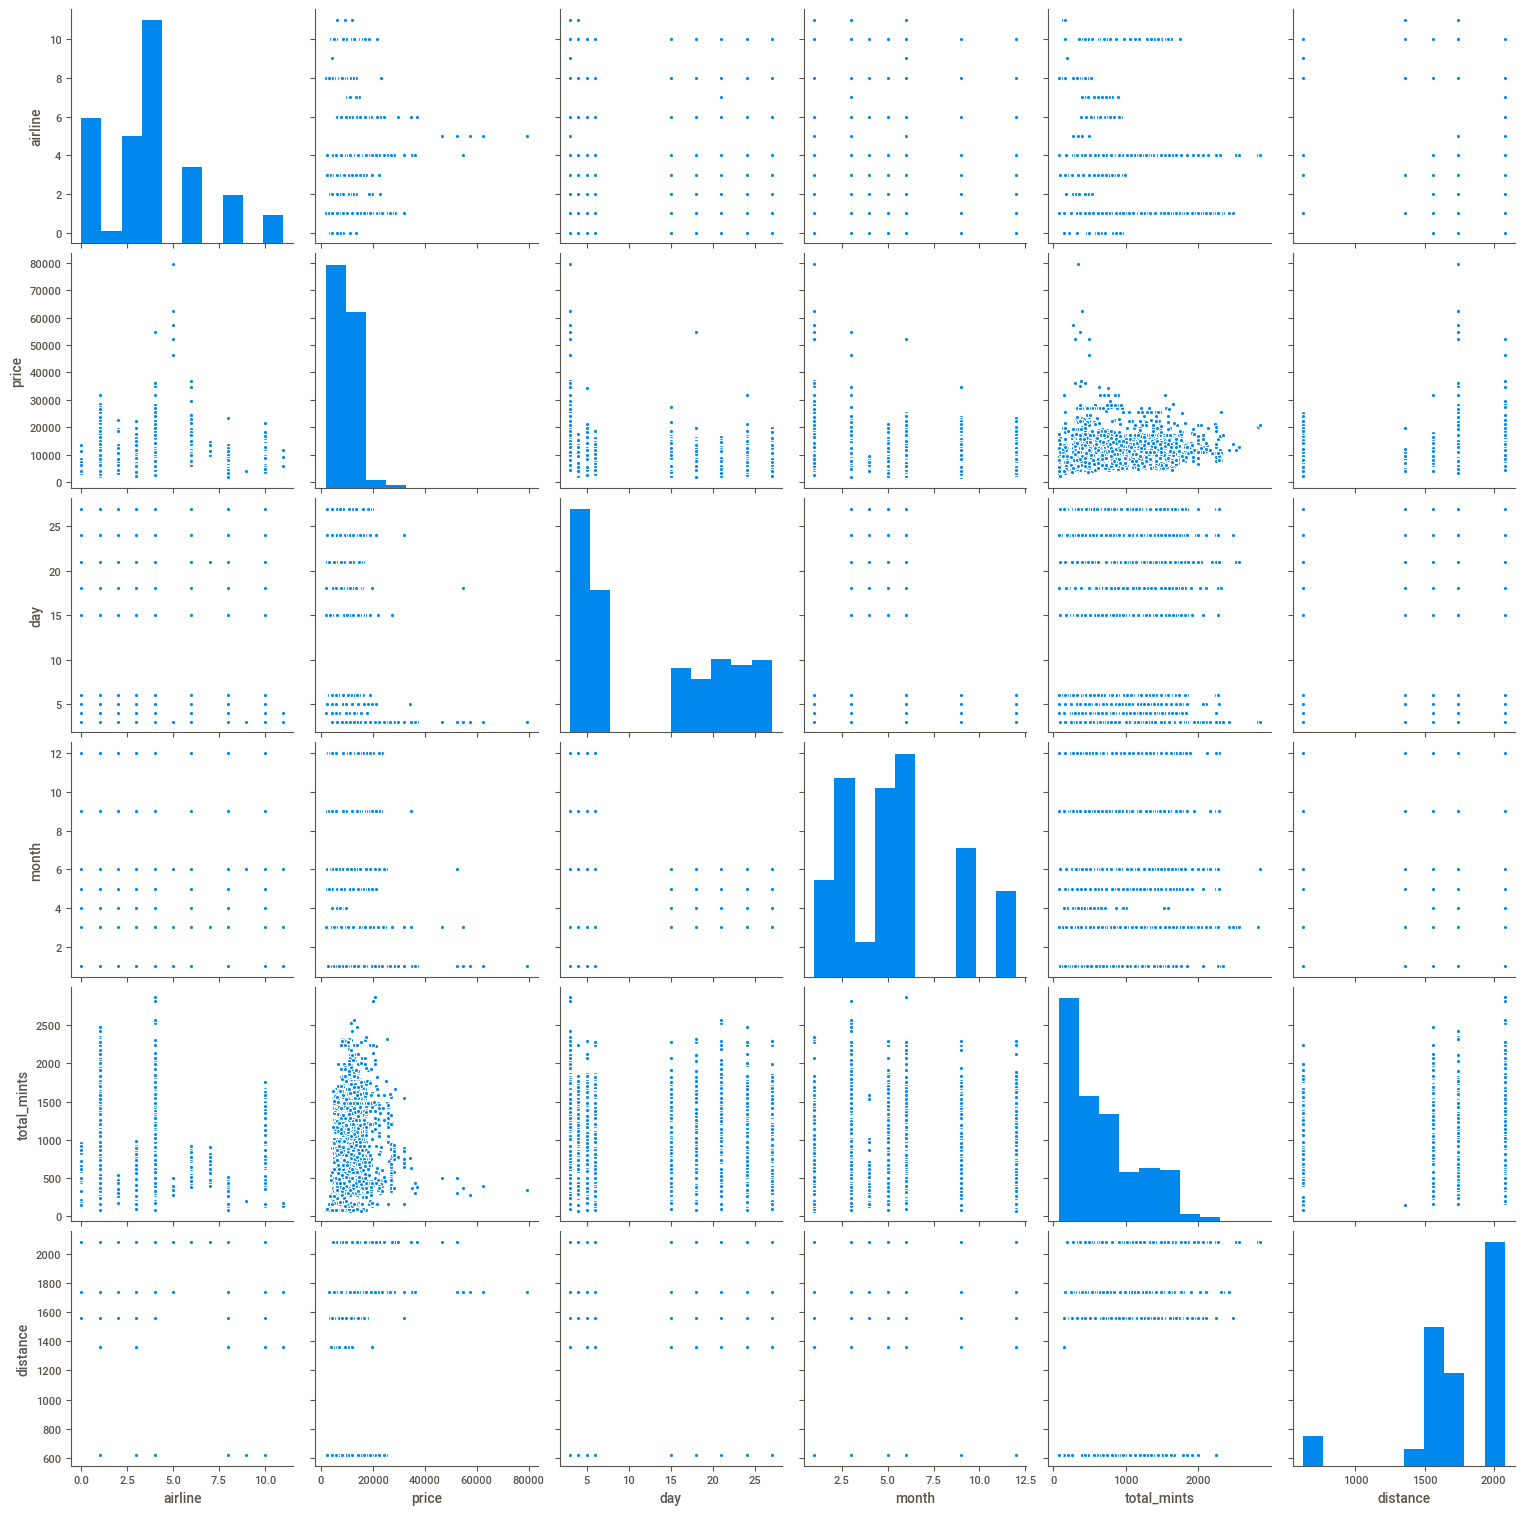

In [243]:
sns.pairplot(train)

In [244]:
# applying dummy encoding on airline feature 
train = pd.get_dummies(train,columns =["source","destination"],drop_first = True)
test  = pd.get_dummies(test,columns =["source","destination"],drop_first = True)

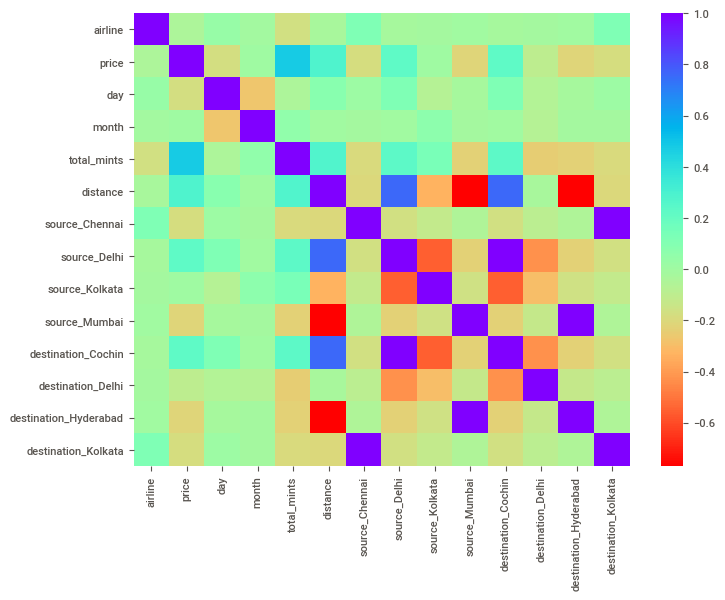

In [245]:
plt.rcParams["figure.figsize"] =(8,6)
sns.heatmap(train.corr(),annot = False,cmap = 'rainbow_r')

# Modeling Building 

In [246]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
import xgboost 
from sklearn.model_selection import train_test_split
#from sklean.

In [247]:
x = train.drop(["price"],axis =1 )
y = train["price"]

# RandomForest

In [248]:
rf = RandomForestRegressor()

In [249]:
param_grid = {
    
    "n_estimators" : [50,100,150,250,300,350,400],
    "max_depth" : [i for i in range(7,25)],
    "min_samples_split" : [i for i in range(5,25)],
    "min_samples_leaf" : [2,3,4,5,7,10]
    
}

In [250]:
rf = RandomizedSearchCV(rf,param_distributions = param_grid ,n_jobs = -1,cv = 10)
rf.fit(x,y)

RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [7, 8, 9, 10, 11, 12, 13,
                                                      14, 15, 16, 17, 18, 19,
                                                      20, 21, 22, 23, 24],
                                        'min_samples_leaf': [2, 3, 4, 5, 7, 10],
                                        'min_samples_split': [5, 6, 7, 8, 9, 10,
                                                              11, 12, 13, 14,
                                                              15, 16, 17, 18,
                                                              19, 20, 21, 22,
                                                              23, 24],
                                        'n_estimators': [50, 100, 150, 250, 300,
                                                         350, 400]})

In [251]:
rf.best_params_

{'n_estimators': 150,
 'min_samples_split': 20,
 'min_samples_leaf': 3,
 'max_depth': 16}

In [252]:
ytrain_pred = rf.predict(x)

In [253]:
# Calculate Rsqaure and adjusted rsquare 
r2 = r2_score(y,ytrain_pred)
# calculate adjusted_r2_score 
# adj_sc = 1 - (((1-r2)*(n-1))/(n-p-1))
p = x.shape[1]
n = x.shape[0]
adj_r2 = 1 - (((1-r2)*(n-1))/(n-p-1))
print("r2_square    : ",r2)
print("adj_r2_score : ",adj_r2)
print("\n MAE   : ",np.sqrt(mean_absolute_error(y,ytrain_pred)))
print("\n RMSE   : ",np.sqrt(mean_squared_error(y,ytrain_pred)))

r2_square    :  0.810739943808274
adj_r2_score :  0.8104851668868188

 MAE   :  35.59228908580051

 RMSE   :  2009.4125344472384


In [254]:
train.head(5)

,airline,price,day,month,total_mints,distance,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata
0,3,3897,24,3,170,1740.0,0,0,0,0,0,1,0,0
1,1,7662,5,1,445,1561.0,0,0,1,0,0,0,0,0
2,4,13882,6,9,1140,2080.0,0,1,0,0,1,0,0,0
3,3,6218,5,12,325,1561.0,0,0,1,0,0,0,0,0
4,3,13302,3,1,285,1740.0,0,0,0,0,0,1,0,0


In [255]:
print("Predicted Sample Values : ")
rf.predict(x.head(5))

Predicted Sample Values : 


array([ 6005.20384681,  9596.40857752, 12209.4471854 ,  6299.4394087 ,
       15064.79249597])

 actual vs predicted


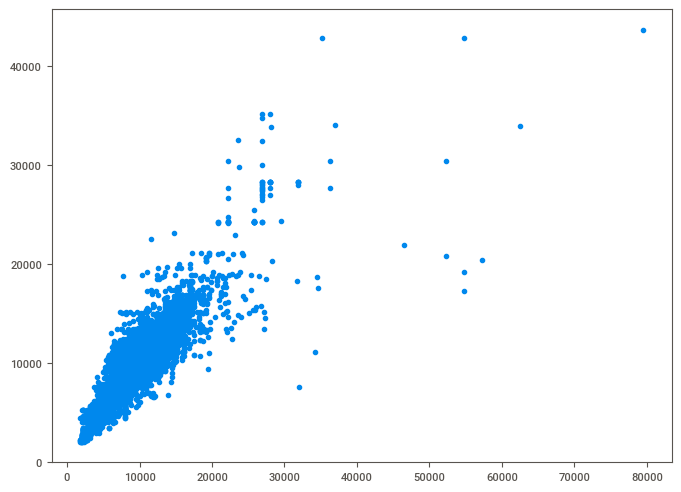

In [256]:
print(" actual vs predicted")
plt.scatter(y,ytrain_pred)
plt.show()

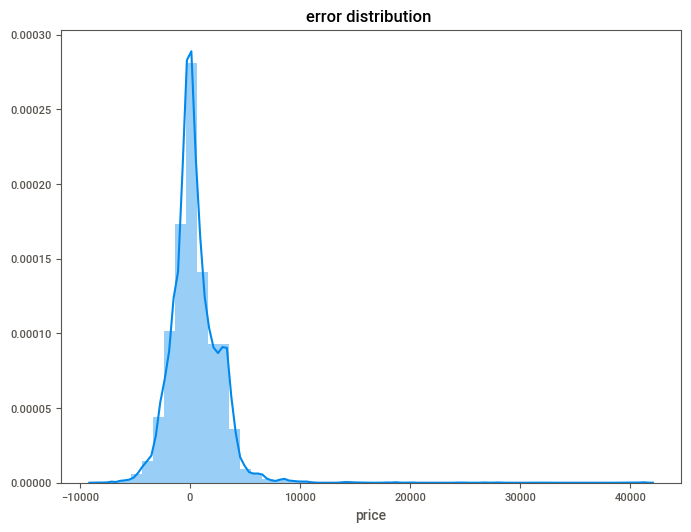

In [267]:
sns.distplot(y-ytrain_pred)
plt.title("error distribution ")
plt.show()

# Xgboost

In [258]:
xg = xgboost.XGBRegressor(gamma=0,booster = "gbtree",learning_rate = 0.03)
xg.fit(x,y)
#xg = RandomizedSearchCV(estimator = xg,param_distributions =param_grid,cv = 10,n_jobs = -1 )

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.03, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [259]:
ytrain_pred = xg.predict(x)

In [260]:
# Calculate Rsqaure and adjusted rsquare 
r2 = r2_score(y,ytrain_pred)
# calculate adjusted_r2_score 
# adj_sc = 1 - (((1-r2)*(n-1))/(n-p-1))
p = x.shape[1]
n = x.shape[0]
adj_r2 = 1 - (((1-r2)*(n-1))/(n-p-1))
print("r2_square    : ",r2)
print("adj_r2_score : ",adj_r2)

print("\n MSE   : ",np.sqrt(mean_squared_error(y,ytrain_pred)))
print("\n MAE   : ",np.sqrt(mean_absolute_error(y,ytrain_pred)))

r2_square    :  0.7581016681478355
adj_r2_score :  0.7577760309609164

 MSE   :  2271.726590037806

 MAE   :  39.19222148903452


In [261]:
train.head(5)

,airline,price,day,month,total_mints,distance,source_Chennai,source_Delhi,source_Kolkata,source_Mumbai,destination_Cochin,destination_Delhi,destination_Hyderabad,destination_Kolkata
0,3,3897,24,3,170,1740.0,0,0,0,0,0,1,0,0
1,1,7662,5,1,445,1561.0,0,0,1,0,0,0,0,0
2,4,13882,6,9,1140,2080.0,0,1,0,0,1,0,0,0
3,3,6218,5,12,325,1561.0,0,0,1,0,0,0,0,0
4,3,13302,3,1,285,1740.0,0,0,0,0,0,1,0,0


In [262]:
print("Predicted Sample Values : ")
xg.predict(x.head(5))

Predicted Sample Values : 


array([ 4800.122,  9168.939, 11702.99 ,  6135.852, 10310.919],
      dtype=float32)

 actual vs predicted


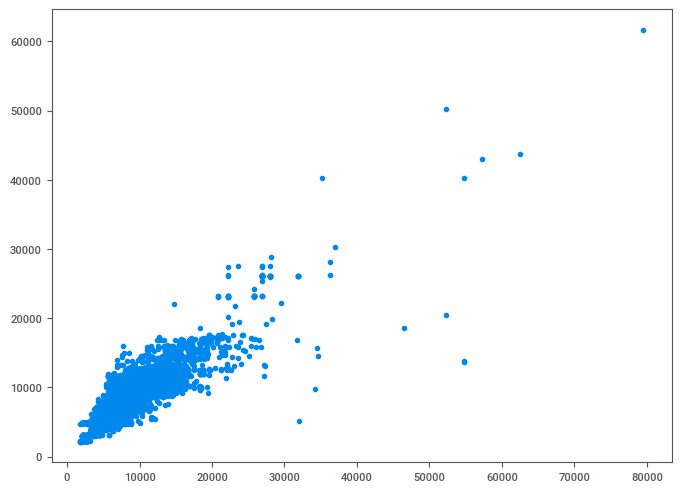

In [263]:
print(" actual vs predicted")
plt.scatter(y,ytrain_pred)
plt.show()

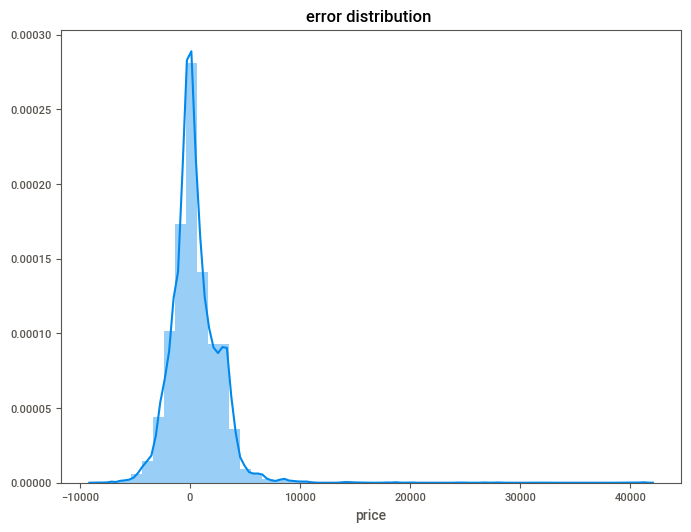

In [268]:
sns.distplot(y-ytrain_pred)
plt.title("error distribution ")
plt.show()

# Thank You ! 